0 2.963874340057373
1 2.751913070678711
2 2.6319682598114014
3 2.563323974609375
4 2.5186941623687744
5 2.484245538711548
6 2.4540188312530518
7 2.425664186477661
8 2.39829421043396
9 2.3715806007385254
10 2.3453996181488037
11 2.3197035789489746
12 2.2944698333740234
13 2.2696874141693115
14 2.245346784591675
15 2.221440076828003
16 2.197960376739502
17 2.1749000549316406
18 2.152252435684204
19 2.1300101280212402
20 2.108166217803955
21 2.0867135524749756
22 2.065645217895508
23 2.0449538230895996
24 2.0246329307556152
25 2.0046756267547607
26 1.9850752353668213
27 1.9658242464065552
28 1.9469166994094849
29 1.9283456802368164
30 1.9101048707962036
31 1.892187476158142
32 1.8745875358581543
33 1.857298493385315
34 1.840314269065857
35 1.8236284255981445
36 1.8072354793548584
37 1.7911288738250732
38 1.7753031253814697
39 1.7597525119781494
40 1.744471549987793
41 1.7294542789459229
42 1.714695692062378
43 1.7001898288726807
44 1.68593168258667
45 1.6719164848327637
46 1.6581387519836

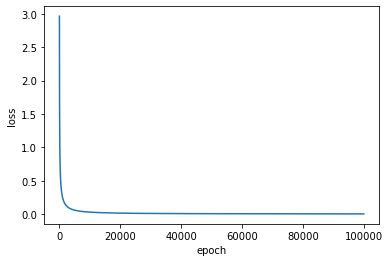

In [2]:
import torch
import matplotlib.pyplot as plt


# prepare dataset
# x,y是矩阵，3行1列 也就是说总共有3个数据，每个数据只有1个特征
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[0.0], [0.0], [1.0]])
 
#design model using class
"""
our model class should be inherit from nn.Module, which is base class for all neural network modules.
member methods __init__() and forward() have to be implemented
class nn.linear contain two member Tensors: weight and bias
class nn.Linear has implemented the magic method __call__(),which enable the instance of the class can
be called just like a function.Normally the forward() will be called 
"""
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # (1,1)是指输入x和输出y的特征维度，这里数据集中的x和y的特征都是1维的
        # 该线性层需要学习的参数是w和b  获取w/b的方式分别是~linear.weight/linear.bias
        self.linear = torch.nn.Linear(1, 1)
        self.Sigmoid = torch.nn.Sigmoid()
 
    def forward(self, x):
        x = self.linear(x)
        y_pred = self.Sigmoid(x)
        return y_pred
 
model = LinearModel()
 
# construct loss and optimizer
criterion = torch.nn.BCELoss(reduction = 'sum')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1) # model.parameters()自动完成参数的初始化操作

epoch = 0
epoch_list = []
loss_list = []
# training cycle forward, backward, update
while True:
    y_pred = model(x_data) # forward:predict
    loss = criterion(y_pred, y_data) # forward: loss
    loss.backward() # backward: autograd，自动计算梯度
    optimizer.step() # update 参数，即更新w和b的值
    optimizer.zero_grad() # the grad computer by .backward() will be accumulated. so before backward, remember set the grad to zero
    print(epoch, loss.item())    
    epoch_list.append(epoch)
    loss_list.append(loss.item())
    epoch += 1
    if((loss.item() < 1e-5)|(epoch > 100000)):
        break


x_test = torch.tensor([[4.0]])
y_test = model(x_test)
print('y_pred = ', y_test.item())

plt.plot(epoch_list, loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [ ]:
import torch
 
# prepare dataset
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[0], [0], [1]])
 
#design model using class
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1,1)
 
    def forward(self, x):
        # y_pred = F.sigmoid(self.linear(x))
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
model = LogisticRegressionModel()
 
# construct loss and optimizer
# 默认情况下，loss会基于element平均，如果size_average=False的话，loss会被累加。
criterion = torch.nn.BCELoss(reduction = "sum") 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# training cycle forward, backward, update
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 
print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())
 
x_test = torch.Tensor([[4.0]])
y_test = model(x_test)
print('y_pred = ', y_test.item())

0 1.8486173152923584
1 1.8315184116363525
2 1.8148956298828125
3 1.798624038696289
4 1.7826573848724365
5 1.7669752836227417
6 1.75156831741333
7 1.7364280223846436
8 1.7215490341186523
9 1.7069261074066162
10 1.692553162574768
11 1.6784250736236572
12 1.6645374298095703
13 1.6508843898773193
14 1.637461543083191
15 1.6242636442184448
16 1.6112864017486572
17 1.598524808883667
18 1.585974931716919
19 1.5736315250396729
20 1.561490774154663
21 1.5495483875274658
22 1.5377999544143677
23 1.526241660118103
24 1.514869213104248
25 1.5036789178848267
26 1.4926670789718628
27 1.4818296432495117
28 1.471163272857666
29 1.4606640338897705
30 1.4503288269042969
31 1.4401540756225586
32 1.4301363229751587
33 1.4202725887298584
34 1.4105592966079712
35 1.4009935855865479
36 1.3915724754333496
37 1.3822928667068481
38 1.3731517791748047
39 1.3641464710235596
40 1.3552740812301636
41 1.3465321063995361
42 1.337917685508728
43 1.3294281959533691
44 1.3210612535476685
45 1.312814474105835
46 1.304685